In [1]:
# https://github.com/fuzailpalnak/building-footprint-segmentation

In [1]:
import matplotlib.pyplot as plt
import cv2
import glob
import os
from tqdm.notebook import tqdm
from models_ext import foot_print_model

from models_ext.foot_print_model import set_model_weights
set_model_weights()


/home/tema/.cache/pypoetry/virtualenvs/skoltech-infrastructure-C-Wfqsxm-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tema/.cache/pypoetry/virtualenvs/skoltech-infrastructure-C-Wfqsxm-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/tema/.cache/pypoetry/virtualenvs/skoltech-infrastructure-C-Wfqsxm-py3.10/lib/python3.10/site-packages/torch/hub.py:682: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile form

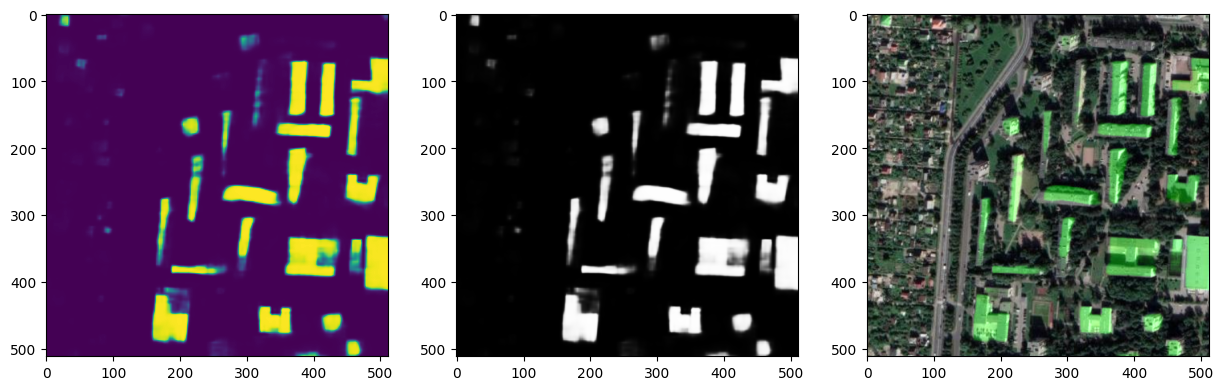

In [2]:
PRED_PTH = r"/home/tema/CODE/skoltech-Infrastructure_2/data/digital_leaders/tiles/train_image_019/images/tile_2048_3072.png"

pred = foot_print_model.predict_from_path(PRED_PTH)

fig,ax = plt.subplots(1,3,figsize = (15,15))
ax = ax.ravel()
for i in range(3):
  image = pred[i]
  ax[i].imshow(image)  
plt.show()  

In [3]:
from src.modelling.metrics import DiceMetric
import torch
metric = DiceMetric()
# metric(torch.Tensor((pred[1][:, :, 2] > 0.8)), torch.Tensor(mask))

In [4]:
from models_ext.calculate_metrics import plot_result_tile

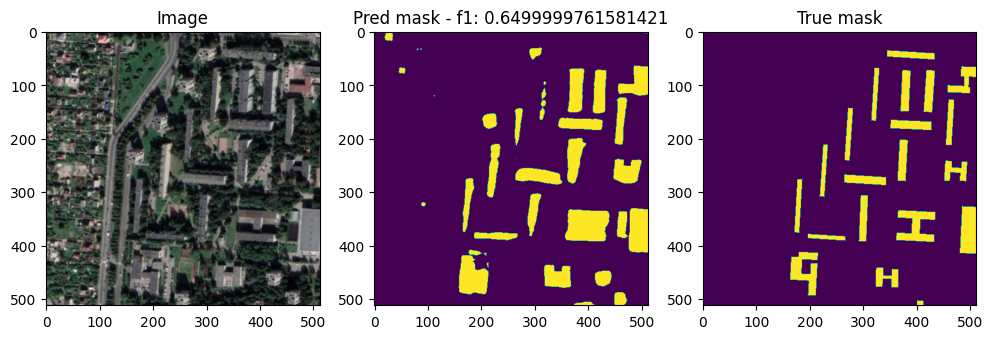

In [9]:

IMAGE_PATH = r"/home/tema/CODE/skoltech-Infrastructure_2/data/digital_leaders/tiles/train_image_019/images/tile_2048_3072.png"
MASK_PATH = IMAGE_PATH.replace("images", "masks").replace("tile_", "mask_tile_")
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(MASK_PATH)[:, :, 0]

prediction_binary, prediction_3_channels, dst = foot_print_model.predict(image)
pred_mask = (prediction_binary > 0.2) * 1

plot_result_tile(image, pred_mask, mask)

In [32]:
tiles_folders = glob.glob("./data/digital_leaders/tiles/*")

paths = []
for folder in tiles_folders:
    paths.extend(glob.glob(os.path.join(folder, "images", "*.png")))


In [34]:
metrics = []
for path in tqdm(paths):
    img_path = path
    mask_path = path.replace("images", "masks").replace("tile_", "mask_tile_")
    
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    mask = cv2.imread(mask_path)[:, :, 0]
    
    prediction_binary, prediction_3_channels, dst = foot_print_model.predict(image)
    pred_mask = (prediction_binary > 0.2) * 1
    
    metrics.append(metric(torch.Tensor(pred_mask), torch.Tensor(mask)))
    

  0%|          | 0/3422 [00:00<?, ?it/s]

/home/tema/.cache/pypoetry/virtualenvs/skoltech-infrastructure-C-Wfqsxm-py3.10/lib/python3.10/site-packages/torch/hub.py:682: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '

KeyboardInterrupt



In [37]:
import numpy as np
np.mean(metrics)

0.37424564